# Case Study 2

In this case study we will investigate the effect of the initial basis set on the accuracy of PauliNet. We are going to use a simple molecule, lithium hydride, such that we can quickly carry out highly correlated calculations to compare the results.

In the following, every cell contains extensive comments to guide you through this notebook and allow you to understand all the steps.

## PauliNet training

For this case study, we are going to use the default network architecture of PauliNet. The only parameters that we are going to change are the basis sets used to generate the mean-field orbitals, and the training parameters (to speed up a little the network optimization).
Some of these calculations can become quite expensive, so depending on the computing power at your disposal this might take several minutes to hours.
If you have access to a Nvidia GPU, it can significantly speed up this process.

In [2]:
# import deepqmc package and PauliNet
import deepqmc
from deepqmc.wf import PauliNet

Let us start by defining the lithium hydride molecule in the datastructure that deepqmc understands and initialize an empty list in which we will save the ground state energies obtained with PauliNet.

In [3]:
# define the LiH molecule using the deepqmc datastructure
LiH_deepqmc = deepqmc.Molecule(
    coords  = [[0.0,0.0,0.0],[3.0141132,0.0,0.0]],
    charges = [3,1],
    charge  = 0,
    spin    = 0)

# initialize list to save the energies
E_paulinet = []

Next, we are going to initialize the default PauliNet architecture starting from a single Hartree-Fock calculation in combination with different basis sets. For this case study we are going to use the cc-pvxz family of basis sets, which allow us to perform complete basis set extrapolations.

Note that PauliNet initialized in this way is using a single Slater determinant.

In [4]:
# define the neural networks with increasing basis set sizes
net_dz = PauliNet.from_hf(LiH_deepqmc,basis='cc-pvdz')
net_tz = PauliNet.from_hf(LiH_deepqmc,basis='cc-pvtz')
net_qz = PauliNet.from_hf(LiH_deepqmc,basis='cc-pvqz')
net_5z = PauliNet.from_hf(LiH_deepqmc,basis='cc-pv5z')

# if you have access to Nvidia GPUs and you would like to use
# them to train and evaluate the PauliNet wavefunction, initialize
# the networks with an addition .cuda() at the end of the line, e.g.
#
# net_dz = PauliNet.from_hf(LiH_deepqmc,basis='cc-pvdz').cuda()
#

converged SCF energy = -7.98365070477958
converged SCF energy = -7.9867833502087
converged SCF energy = -7.9872293851667
converged SCF energy = -7.98733105685954


At this point, we can already train the neural networks. This is the most expensive part of the calculation and it can take up to a few hours, depending on your computing resources. The training parameters have been adjusted to minimize the time required, but you are free to experiment yourself their impact on the training performance.

First, we train the network initialized with a double zeta basis set.  
The parameters passed to the `deepqmc.train()` function are explained in detail at https://deepqmc.github.io/api.html.

Specification of the `workdir` allows to follow the optimization procedure with [tensorboard](https://www.tensorflow.org/tensorboard), which should have been automatically installed along with deepqmc. Once the training is running, type in a terminal window the command `tensorboard --logdir path/to/LiH/` (where `path/to/LiH/` should point to the folder passed to `workdir` without the basis set part), and then follow the instruction from the terminal to open a browser tab with tensorboard.

We are now ready to start the calculation with the cc-pvdz basis set.

### PauliNet: cc-pvdz

In [5]:
# train the network initialized with the cc-pvdz basis set
# n_steps: total number of optimization steps (default: 10000)
# batch_size: number of samples used in a optimization step (default: 10000)
# epoch_size: number of steps before the WF is resampled (default: 100)

deepqmc.train(net_dz, n_steps=500, batch_size=500, epoch_size=20, workdir='LiH/cc-pvdz')

equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/500 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

Once the network is trained, we can evaluate the energy:

In [6]:
# evaluate the ground state energy with the trained network (cc-pvdz)
# n_steps: number of Monte Carlo sweeps (default: 500)
# sample_size: length of the Markov chain (default: 1000)
deepqmc.evaluate(net_dz, n_steps=400, sample_size=800)

equilibrating: 0it [00:00, ?it/s]

{'energy': -8.06555190199241+/-0.0008981907669284799}

In [4]:
E_paulinet.append(-8.06555190199241)

We can now repeat the same operation for the other three netowkrs with different basis set sizes.

### PauliNet: cc-pvtz

In [7]:
# train the network initialized with the cc-pvtz basis set

deepqmc.train(net_tz, n_steps=500, batch_size=500, epoch_size=20, workdir='LiH/cc-pvtz')

equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/500 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
# evaluate the ground state energy with the trained network (cc-pvtz)
# n_steps: number of Monte Carlo sweeps (default: 500)
# sample_size: length of the Markov chain (default: 1000)

deepqmc.evaluate(net_tz, n_steps=400, sample_size=800)

equilibrating: 0it [00:00, ?it/s]

{'energy': -8.067064300499856+/-0.0007580727526534067}

In [5]:
E_paulinet.append(-8.067064300499856)

### PauliNet: cc-pvqz

In [9]:
# train the network initialized with the cc-pvqz basis set

deepqmc.train(net_qz, n_steps=500, batch_size=500, epoch_size=20, workdir='LiH/cc-pvqz')

equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/500 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
# evaluate the ground state energy with the trained network (cc-pvqz)
# n_steps: number of Monte Carlo sweeps (default: 500)
# sample_size: length of the Markov chain (default: 1000)

deepqmc.evaluate(net_qz, n_steps=400, sample_size=800)

equilibrating: 0it [00:00, ?it/s]

{'energy': -8.067978326804935+/-0.0006198147440780272}

In [6]:
E_paulinet.append(-8.067978326804935)

### PauliNet: cc-pv5z

In [11]:
# train the network initialized with the cc-pvqz basis set

deepqmc.train(net_5z, n_steps=500, batch_size=500, epoch_size=20, workdir='LiH/cc-pv5z')

equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/500 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

sampling:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
# evaluate the ground state energy with the trained network (cc-pv5z)
# n_steps: number of Monte Carlo sweeps (default: 500)
# sample_size: length of the Markov chain (default: 1000)

deepqmc.evaluate(net_5z, n_steps=400, sample_size=800)

equilibrating: 0it [00:00, ?it/s]

{'energy': -8.068197283573449+/-0.0007558230401955294}

In [7]:
E_paulinet.append(-8.068197283573449)

## Traditional quantum chemistry calculations

In this part we are going to perform traditional quantum chemical calculations using coupled cluster theory. We are going to use CCSD(T) with an increasing basis set size, starting from cc-pvdz up to cc-pv5z.
This will allow us to use extrapolation techniques to the complete basis set limit and compare the results with those obtained by PauliNet.

In [8]:
# import relevant modules from pyscf
from pyscf import gto,scf,cc,fci

Like before, we need to define the molecule in a datastructure that pyscf understand, as well as initialize the arrays containing the energies computed.

In [9]:
# define the LiH molecule using the pyscf datastructure
LiH_pyscf  = gto.M(
    atom   = 'Li 0.0 0.0 0.0;H 3.0141132 0.0 0.0',
    charge = 0,
    spin   = 0,
    unit   = 'Bohr')

# initialize arrays to keep energies
E_rhf    = []
E_ccsd   = []
E_ccsd_t = []
E_fci    = []

We are now ready to perform the calculations, starting with cc-pvdz.

### CCSD(T): cc-pvdz

In [10]:
# set the cc-pvdz basis set
LiH_pyscf.basis = 'cc-pvdz'
LiH_pyscf.build()

# perform a restricted Hartree-Fock calculation
rhf_dz = scf.RHF(LiH_pyscf)
energy = rhf_dz.kernel()
E_rhf.append(energy)

converged SCF energy = -7.98361586710687


In [11]:
# perform a CCSD calculation
ccsd_dz = cc.CCSD(rhf_dz)
energy  = ccsd_dz.kernel()[0]
E_ccsd.append(energy)

E(CCSD) = -8.014717265233241  E_corr = -0.03110139812637423


In [12]:
# compute perturbative corrections for triples
energy = ccsd_dz.ccsd_t()
E_ccsd_t.append(energy)

CCSD(T) correction = -9.35512995087554e-06


In [18]:
# perform FCI calculation (4,19) active space
fci_dz = fci.FCI(rhf_dz)
energy = fci_dz.kernel()[0]
E_fci.append(energy)
print('E(FCI) = ',energy)

E(FCI) =  -8.014728026856043


### CCSD(T): cc-pvtz

In [13]:
# set the cc-pvtz basis set
LiH_pyscf.basis = 'cc-pvtz'
LiH_pyscf.build()

# perform a restricted Hartree-Fock calculation
rhf_tz = scf.RHF(LiH_pyscf)
energy = rhf_tz.kernel()
E_rhf.append(energy)

converged SCF energy = -7.98663267395152


In [14]:
# perform a CCSD calculation
ccsd_tz = cc.CCSD(rhf_tz)
energy  = ccsd_tz.kernel()[0]
E_ccsd.append(energy)

E(CCSD) = -8.036618139548487  E_corr = -0.04998546559697128


In [15]:
# compute perturbative corrections for triples
energy = ccsd_tz.ccsd_t()
E_ccsd_t.append(energy)

CCSD(T) correction = -6.96456791428138e-05


In [22]:
# perform FCI calculation (4,48) active space
fci_tz = fci.FCI(rhf_tz)
energy = fci_tz.kernel()[0]
E_fci.append(energy)
print('E(FCI) = ',energy)

E(FCI) =  -8.036701923959226


### CCSD(T): cc-pvqz

In [16]:
# set the cc-pvqz basis set
LiH_pyscf.basis = 'cc-pvqz'
LiH_pyscf.build()

# perform a restricted Hartree-Fock calculation
rhf_qz = scf.RHF(LiH_pyscf)
energy = rhf_qz.kernel()
E_rhf.append(energy)

converged SCF energy = -7.98717705643815


In [17]:
# perform a CCSD calculation
ccsd_qz = cc.CCSD(rhf_qz)
energy  = ccsd_qz.kernel()[0]
E_ccsd.append(energy)

E(CCSD) = -8.042556444452746  E_corr = -0.05537938801459594


In [18]:
# compute perturbative corrections for triples
energy = ccsd_qz.ccsd_t()
E_ccsd_t.append(energy)

CCSD(T) correction = -0.000116582210642366


In [ ]:
# (4,95) active space (very expensive!!)
# fci_qz = fci.FCI(rhf_qz)
# energy = fci_qz.kernel()[0]
# E_fci.append(energy)
# print('E(FCI) = ',energy)

### CCSD(T): cc-pv5z

In [19]:
# set the cc-pv5z basis set
LiH_pyscf.basis = 'cc-pv5z'
LiH_pyscf.build()
# perform a restricted Hartree-Fock calculation
rhf_5z = scf.RHF(LiH_pyscf)
energy = rhf_5z.kernel()
E_rhf.append(energy)

converged SCF energy = -7.9873239503501


In [35]:
# perform a CCSD calculation
ccsd_5z = cc.CCSD(rhf_5z)
energy  = ccsd_5z.kernel()[0]
E_ccsd.append(energy)

E(CCSD) = -8.05347767773565  E_corr = -0.06615372738554838


In [21]:
# compute perturbative corrections for triples
energy = ccsd_5z.ccsd_t()
E_ccsd_t.append(energy)

CCSD(T) correction = -0.00013996423404489


## Comparison of PauliNet and CCSD(T)

In this section we are going to compare the ground state energies obtained with the two approaches.

In [28]:
# import matplotlib
import matplotlib.pyplot as plt

In [36]:
# sum together the energies
x = [2,3,4,5]
E_cc = [rhf + ccsd + ccsd_t for rhf, ccsd, ccsd_t in zip(E_rhf, E_ccsd, E_ccsd_t)]

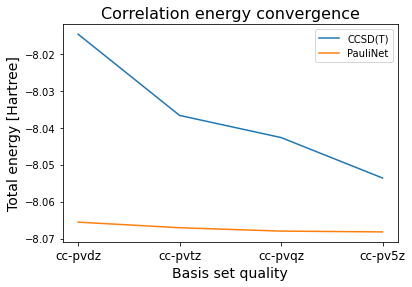

In [39]:
plt.figure(figsize=(6, 4))
# Make the plots

plt.title('Correlation energy convergence', fontsize=16)
plt.xlabel('Basis set quality', fontsize=14)
plt.ylabel('Total energy [Hartree]', fontsize=14)
plt.xticks(x, ('cc-pvdz', 'cc-pvtz', 'cc-pvqz', 'cc-pv5z'),fontsize=12)
# plt.xlim([-0, 1])
# plt.tight_layout()
plt.plot(x, E_cc, label='CCSD(T)')
plt.plot(x, E_paulinet, label='PauliNet')
plt.legend()
plt.show()

We can see from the plot that PauliNet is insensitive to the basis set choice and outperforms CCSD(T).
However, this comes at the price of a much more expensive calculation.